# Machine Learning 

##### The S&P 500 stock data using Lag 1 and Lag 2 as predictors.

1. **Stock Price Analysis**: <br>
    1.1 Logistic Regression Analysis (LRA)<br>
    1.2 Linear Discriminent Analysis (LDA)<br>
    1.3 Quadratic Discriminent Analysis (QDA)<br>

# 1.1 Logistic Model for Stock Price

## Data Preparation 

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats

In [5]:
stock=pd.read_csv('SandP.csv')


In [6]:
stock


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [8]:
# encoding to 1,0
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 

stock['Direction01'] = lb.fit_transform(stock['Direction'])

stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction01
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [9]:
train_s = np.random.rand(len(stock)) < .8
stock_train = stock[train_s]
stock_test = stock[~train_s]
print(stock_train.shape,stock_test.shape)



(1024, 10) (226, 10)


In [10]:
stock_model_log = smf.logit(formula = 'Direction01 ~ Lag1 + Lag2', 
                            data=stock_train).fit()
stock_model_log.summary()



Optimization terminated successfully.
         Current function value: 0.691799
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Direction01   No. Observations:                 1024
Model:                          Logit   Df Residuals:                     1021
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                0.001054
Time:                        02:28:03   Log-Likelihood:                -708.40
converged:                       True   LL-Null:                       -709.15
Covariance Type:            nonrobust   LLR p-value:                    0.4735
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0713      0.063      1.139      0.255      -0.051       0.194
Lag1          -0.0605      0.055     -1.090      0.276      -0.169       0.048
Lag2          -0.0332      0.054     -0.617      0.537      -0.139       0.072
==============================================================================
"""

In [11]:
stock_test_pred = stock_test.copy()
stock_test_pred["predicted_probability"] = stock_model_log.predict(stock_test[['Lag1','Lag2']])


stock_threshold = 0.5
stock_test_pred["prediction_result"]= np.where(stock_test_pred['predicted_probability'] >= stock_threshold, 1,0)     
stock_test_pred

stock_cross = pd.crosstab(stock_test_pred['Direction01'],stock_test_pred['prediction_result'])
stock_cross =stock_cross.rename(index={0:"Down", 1:'Up'}, columns={0:'Down', 1:'Up'})

stock_cross['total'] = stock_cross.sum(axis=1)
stock_cross.loc['total'] = stock_cross.sum()
stock_cross

prediction_result,Down,Up,total
Direction01,,,
Down,20,88,108
Up,11,107,118
total,31,195,226


In [12]:
n = stock_cross
threshhold = stock_threshold

stock_sucesses_lda = (n.iloc[1][1]+n.iloc[0][0])
total_correct_prediction = stock_sucesses_lda/len(stock_test)
dir_up = n.iloc[1][1]/n.iloc[1][0]
dir_down = n.iloc[0][1]/n.iloc[0][0]
the_odds_ratio = dir_up/dir_down

print("The Total Rate of Correct Prediction in LRA: "+str(total_correct_prediction)+" with threshold of "\
      +str(threshhold))
print("The Odd of success for Up: " \
      +str(dir_up)+ " with threshold of: " + str(threshhold))
print("The Odd of success for Down: " \
      +str(dir_down) + " with threshold of: " + str(threshhold))
print("The Odds Ratio of Successes for Up and Down is "+str(the_odds_ratio))



The Total Rate of Correct Prediction in LRA: 0.5619469026548672 with threshold of 0.5
The Odd of success for Up: 9.727272727272727 with threshold of: 0.5
The Odd of success for Down: 4.4 with threshold of: 0.5
The Odds Ratio of Successes for Up and Down is 2.2107438016528924


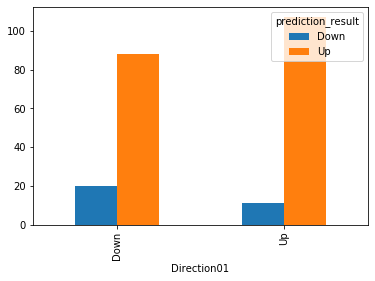

In [13]:
stock_cross.iloc[0:2, 0:2].plot(kind='bar')


### Analysis: We can see that we predicted odds ratio of successes is very good and total rate of prediction is fairly acceptible 



# 1.2 Linear Discriminant Analysis (LDA) for Stock Price



In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics as metrics

stock_lda_mod = LinearDiscriminantAnalysis()
x_test = stock_test_pred[['Lag1','Lag2']]
y_test = stock_test_pred['Direction01']
stock_lda_mod.fit(x_test,y_test)


LinearDiscriminantAnalysis()

In [16]:
x = stock_test_pred[['Lag1','Lag2']]
stock_test_pred['LDAprob'] = stock_lda_mod.predict_proba(x)[:,1]
stock_test_pred['LDApred'] = stock_lda_mod.predict(x)
fpr, tpr, threshold = metrics.roc_curve(stock_test_pred['Direction01'], stock_test_pred['LDAprob'])
roc_auc = metrics.auc(fpr, tpr)




In [17]:
stock_test_pred


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction01,predicted_probability,prediction_result,LDAprob,LDApred
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up,1,0.518650,1,0.512062,1
6,2001,1.392,0.213,0.614,-0.623,1.032,1.44500,-0.403,Down,0,0.495005,0,0.479177,0
16,2001,0.546,-0.562,0.701,0.680,-0.189,1.11880,-1.747,Down,0,0.514228,1,0.522013,1
17,2001,-1.747,0.546,-0.562,0.701,0.680,1.04840,0.359,Up,1,0.539603,1,0.554677,1
20,2001,-0.841,-0.151,0.359,-1.747,0.546,1.15830,-0.623,Down,0,0.531740,1,0.548487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2005,-0.078,0.305,0.845,0.169,-0.345,1.89978,-0.385,Down,0,0.516455,1,0.516284,1
1225,2005,0.347,0.508,0.527,0.440,0.941,1.98540,0.209,Up,1,0.508349,1,0.499595,0
1227,2005,-0.851,0.209,0.347,0.508,0.527,2.01690,0.002,Up,1,0.528911,1,0.539479,1
1233,2005,0.128,-0.236,0.032,1.216,-0.636,2.11074,-0.501,Down,0,0.517834,1,0.524779,1


In [18]:
stock_cross_LDA= pd.crosstab(stock_test_pred['Direction01'],stock_test_pred['LDApred'])

stock_cross_LDA =stock_cross_LDA.rename(index={0:"Down", 1:'Up'}, columns={0:'Down', 1:'Up'})

stock_cross_LDA['total'] = stock_cross_LDA.sum(axis=1)
stock_cross_LDA.loc['total'] = stock_cross_LDA.sum()
stock_cross_LDA


LDApred,Down,Up,total
Direction01,,,
Down,33,75,108
Up,22,96,118
total,55,171,226


In [19]:
stock_test_pred


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction01,predicted_probability,prediction_result,LDAprob,LDApred
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up,1,0.518650,1,0.512062,1
6,2001,1.392,0.213,0.614,-0.623,1.032,1.44500,-0.403,Down,0,0.495005,0,0.479177,0
16,2001,0.546,-0.562,0.701,0.680,-0.189,1.11880,-1.747,Down,0,0.514228,1,0.522013,1
17,2001,-1.747,0.546,-0.562,0.701,0.680,1.04840,0.359,Up,1,0.539603,1,0.554677,1
20,2001,-0.841,-0.151,0.359,-1.747,0.546,1.15830,-0.623,Down,0,0.531740,1,0.548487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2005,-0.078,0.305,0.845,0.169,-0.345,1.89978,-0.385,Down,0,0.516455,1,0.516284,1
1225,2005,0.347,0.508,0.527,0.440,0.941,1.98540,0.209,Up,1,0.508349,1,0.499595,0
1227,2005,-0.851,0.209,0.347,0.508,0.527,2.01690,0.002,Up,1,0.528911,1,0.539479,1
1233,2005,0.128,-0.236,0.032,1.216,-0.636,2.11074,-0.501,Down,0,0.517834,1,0.524779,1


In [20]:
x = stock_cross_LDA

false_pos = x.iloc[0][1]
true_pos = x.iloc[1][1]


print("False Positive: " + str(false_pos))
print("True Positive: " + str(true_pos))

successes_lda = (x.iloc[1][1]+x.iloc[0][0])

tota_correct_prediction_LDA = successes_lda/len(stock_test)

print("The Total Rate of Correct Prediction in LDA: "+str(tota_correct_prediction_LDA))



False Positive: 75
True Positive: 96
The Total Rate of Correct Prediction in LDA: 0.5707964601769911


Text(0.5, 0, 'False Positive Rate')

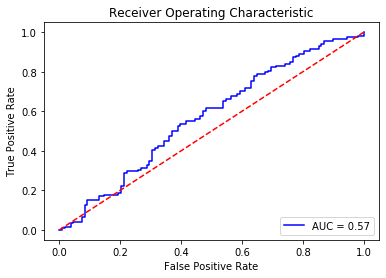

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([-0.02, 1])
#plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Analysis: The stock predictor does not seem to have a strong accuracy in LDA model and this graph shows that the higher the true positive, we have 50% chance of taking false positive too. Thus, tha LDA is not good classifier for this model

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()


x_QDA = stock_test_pred[['Lag1', 'Lag2']]
y_QDA = stock_test_pred['Direction01']

qda.fit(x_QDA,y_QDA)



QuadraticDiscriminantAnalysis()

In [24]:
stock_qda_cross=pd.crosstab(y_QDA,qda.predict(x_QDA))
stock_qda_cross


col_0,0,1
Direction01,,
0,35,73
1,16,102


# 1.3 Quadratic Discriminent Analysis for Stock Price

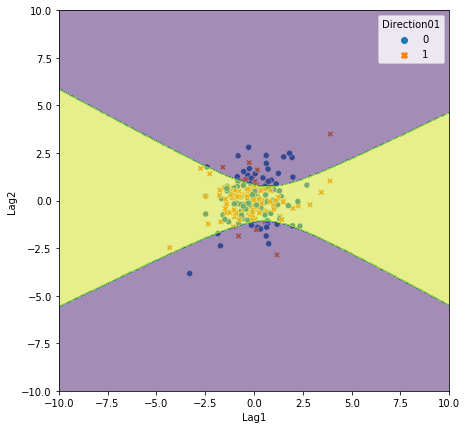

In [25]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_lda = stock_lda_mod.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x='Lag1',y='Lag2',hue='Direction01',style='Direction01',data=stock_test_pred)
plt.contourf(xx, yy, zz_qda > 0.5, alpha=0.5)


In [32]:
#Compariosn of 2 models:

successes_qda = (stock_qda_cross.iloc[1][1]+stock_qda_cross.iloc[0][0])
tota_correct_prediction_QDA = successes_qda/len(stock_test_pred)

print("The Total Rate of Correct Prediction in QDA: "+str(tota_correct_prediction_QDA))

print("The Total Rate of Correct Prediction in LDA: "+str(tota_correct_prediction_LDA))



The Total Rate of Correct Prediction in QDA: 0.6061946902654868
The Total Rate of Correct Prediction in LDA: 0.5707964601769911


### Analysis: We notice the accuracy of our model is around 0.5 which tells not a good model. However, we notice that QDA is preforming better in nonlieanr decision than LDA. In conclusion, we can be sure that we cannon predict the stock market based on two variables of previous two days.
